# Installing and importing libraries

In [48]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [50]:
df = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\data\Netflix\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data cleaning and exploration of the dataset.

In [51]:
def summary(df):
    print(f"Dataset has {df.shape[1]} columns and {df.shape[0]} rows.")
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary["Missing %"] = df.isnull().sum() / len(df) * 100
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

summary(df)

Dataset has 12 columns and 8807 rows.


,Unique,Missing,Missing %,Duplicated,Types
show_id,8807,0,0.000000,0,object
type,2,0,0.000000,0,object
title,8807,0,0.000000,0,object
director,4528,2634,29.908028,0,object
cast,7692,825,9.367549,0,object
country,748,831,9.435676,0,object
date_added,1767,10,0.113546,0,object
release_year,74,0,0.000000,0,int64
rating,17,4,0.045418,0,object
duration,220,3,0.034064,0,object


<Axes: >

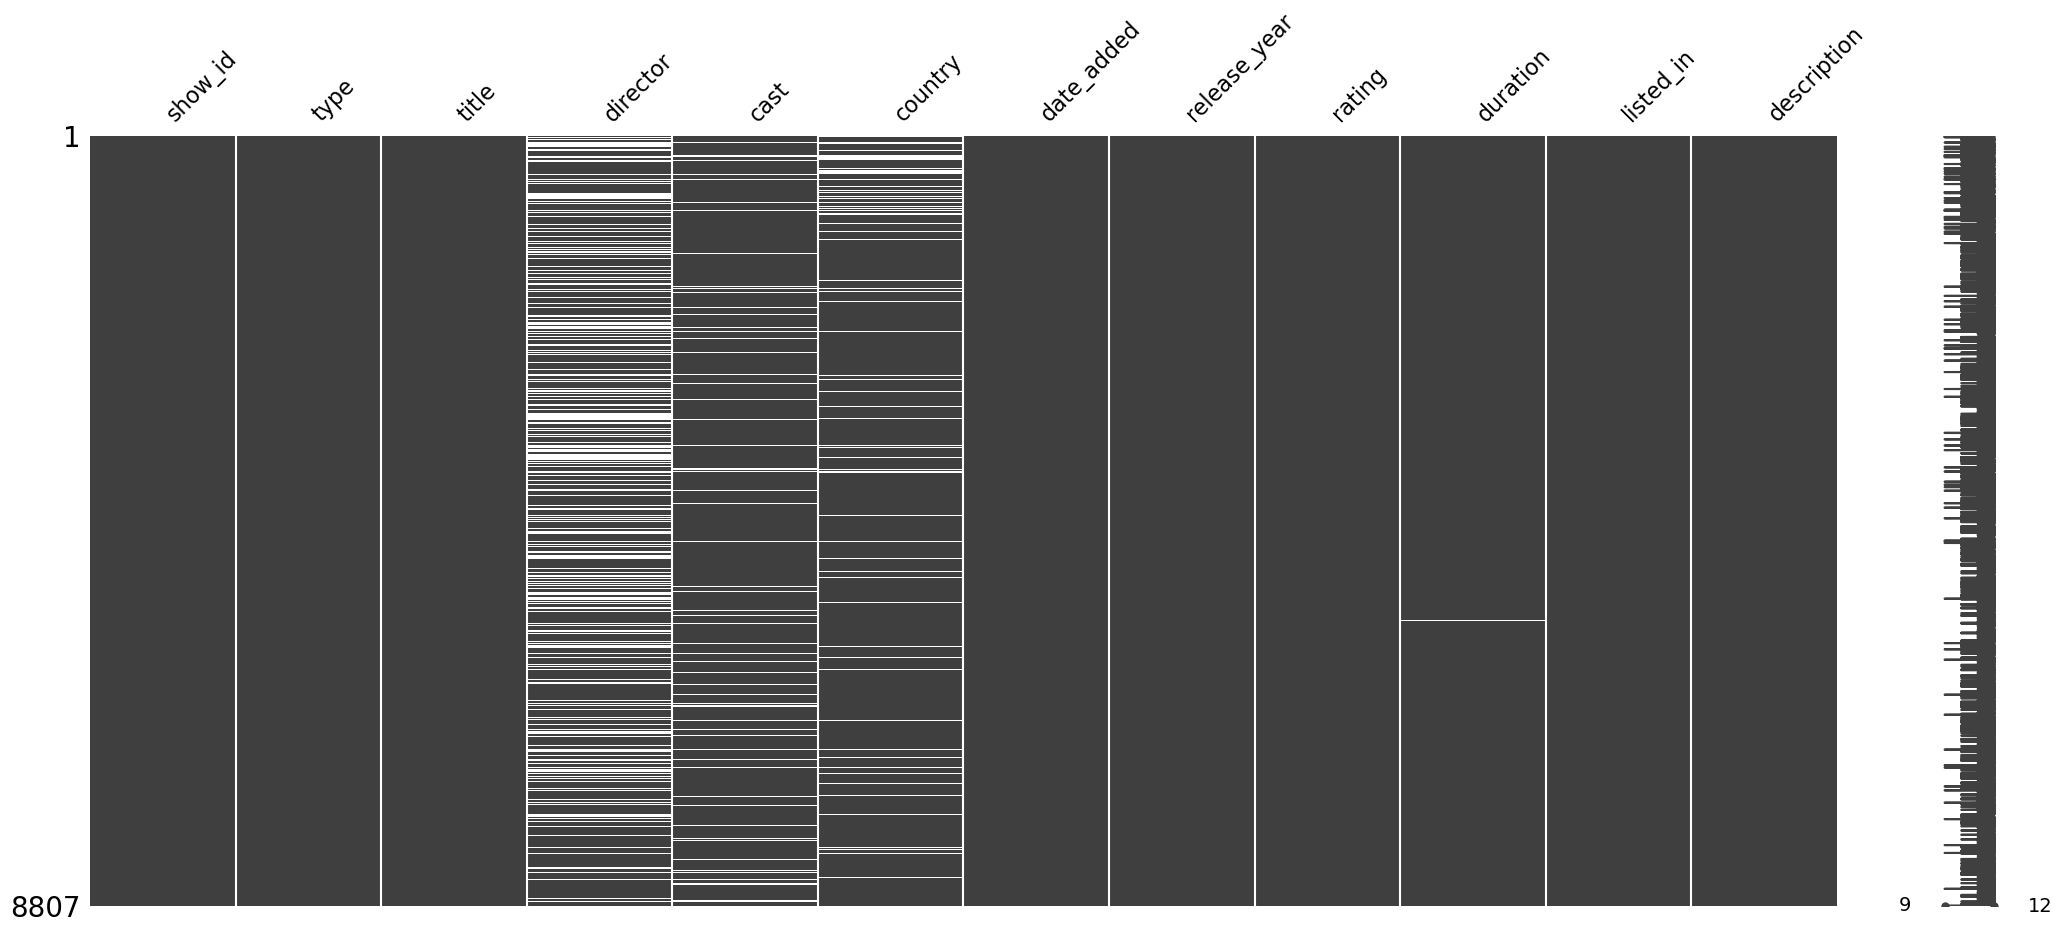

In [52]:
msno.matrix(df)

In [137]:
""""Since null values are more than 5% in director, 
cast and country columns i can't drop them. 
So i will fill the null values with
Unkonwn and i will drop the rest."""

df["director"].fillna("Unknown", inplace=True)
df["cast"].fillna("Unknown", inplace=True)
df["country"].fillna("Unknown", inplace=True)

In [138]:
df.dropna(inplace = True)


In [55]:
def summary(df):
    print(f"Dataset has {df.shape[1]} columns and {df.shape[0]} rows.")
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary["Missing %"] = df.isnull().sum() / len(df) * 100
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

summary(df)

Dataset has 12 columns and 8790 rows.


,Unique,Missing,Missing %,Duplicated,Types
show_id,8790,0,0.0,0,object
type,2,0,0.0,0,object
title,8790,0,0.0,0,object
director,4527,0,0.0,0,object
cast,7679,0,0.0,0,object
country,749,0,0.0,0,object
date_added,1765,0,0.0,0,object
release_year,74,0,0.0,0,int64
rating,14,0,0.0,0,object
duration,220,0,0.0,0,object


<Axes: >

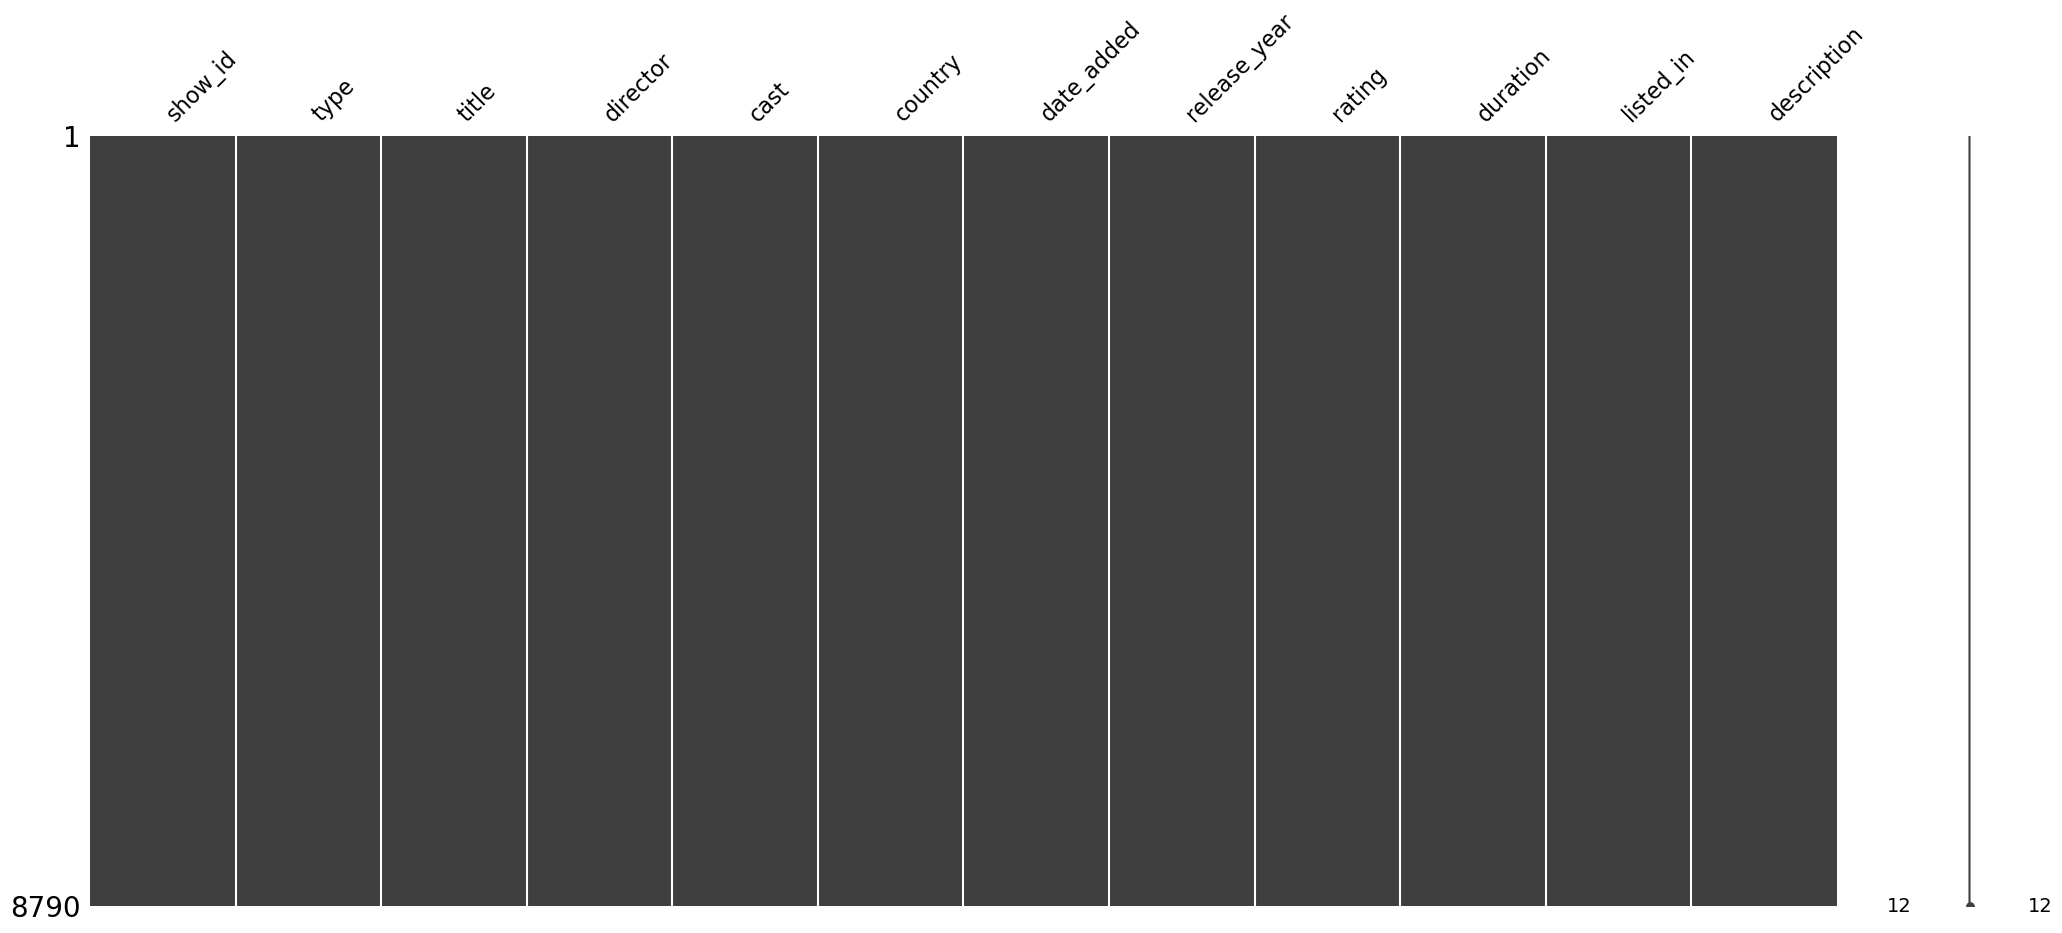

In [56]:
msno.matrix(df)

In [57]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [58]:
df["date_added"] = pd.to_datetime(df["date_added"])

# Data visualization

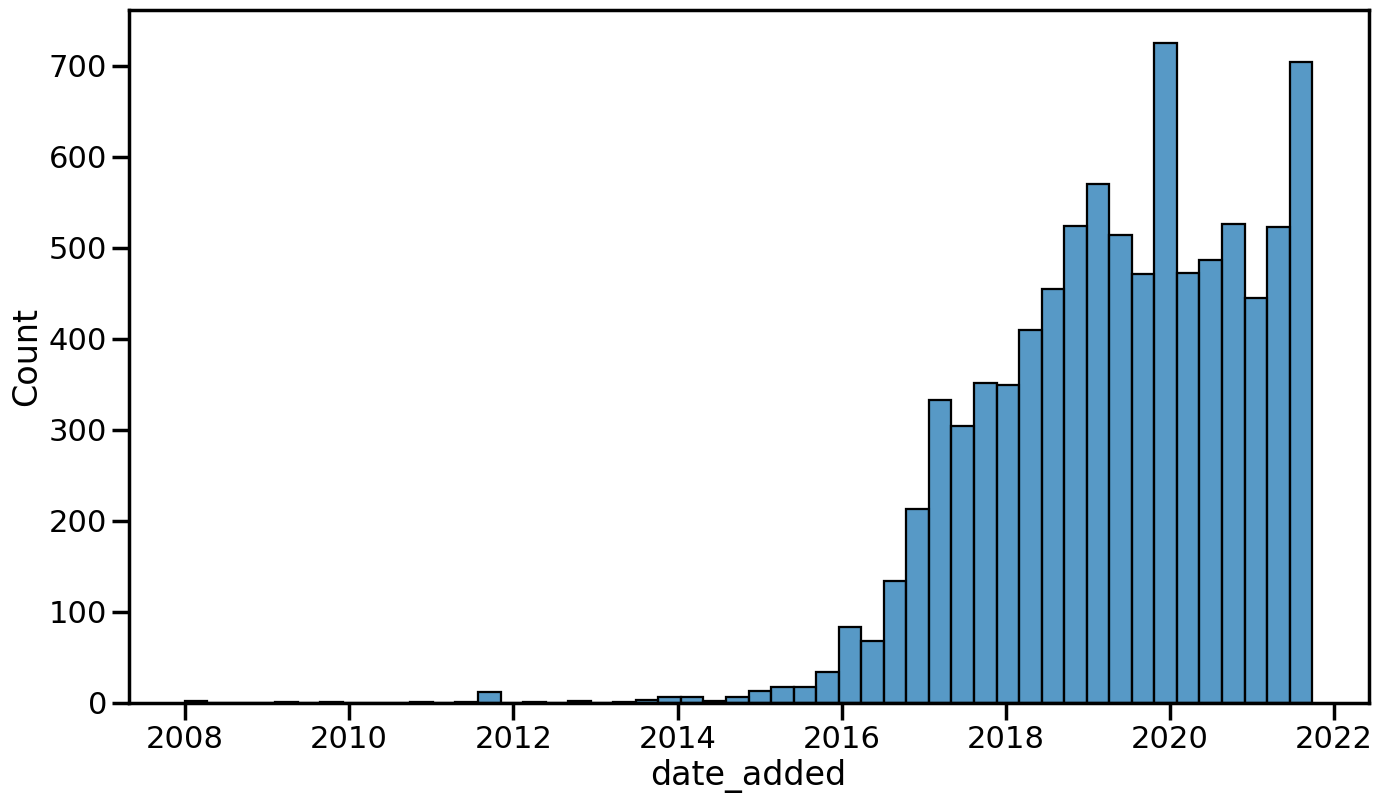

In [117]:
fig = plt.figure(figsize=(16, 9))
sns.histplot(x= "date_added",  data = df, bins = 50)
plt.show()

In [ ]:
# After 2017, the number of movies started to increase rapidly.

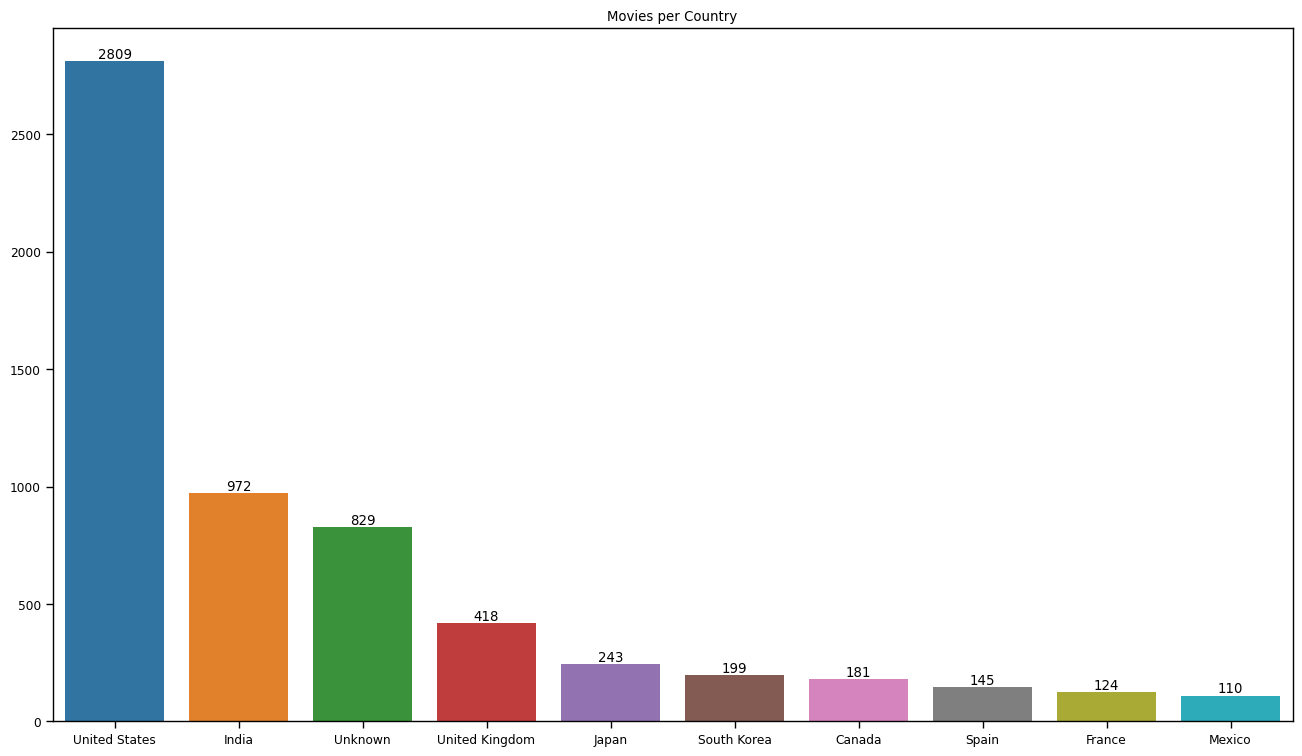

In [123]:
fig = plt.figure(figsize=(16, 9))

sns.countplot(x= "country",  data = df, order = df.country.value_counts().iloc[:10].index)
# Get the value counts for each category
value_counts = df['country'].value_counts()

# Add annotations to the bars
for i, count in enumerate(value_counts):
    plt.annotate(str(count), (i, count), ha='center', va='bottom')
plt.xlabel("")
plt.ylabel("")
plt.title("Movies per Country")
plt.show()

In [ ]:
# No surprise here since the USA has the highest number of movies produced.

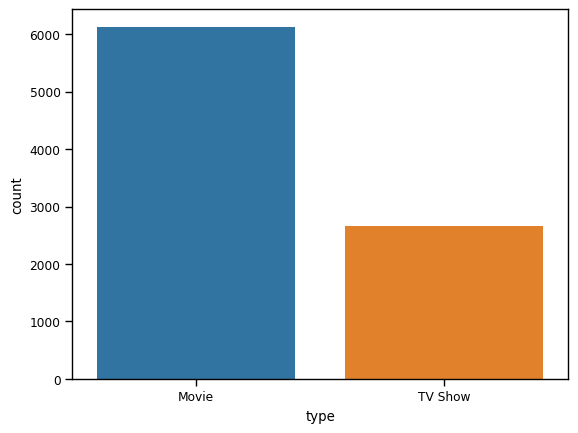

In [122]:
sns.countplot(x= "type", data=df)
plt.show()

In [125]:
# Create a new DataFrame for Movies
movies = df[df['type'] == 'Movie'].copy()

# Create a new DataFrame for Tv Shows
tv_show = df[df['type'] == 'TV Show'].copy()

In [132]:
# Extract the numerical part from the 'duration' column
tv_show['num_seasons'] = df['duration'].str.extract('(\d+)', expand=False).astype(int)

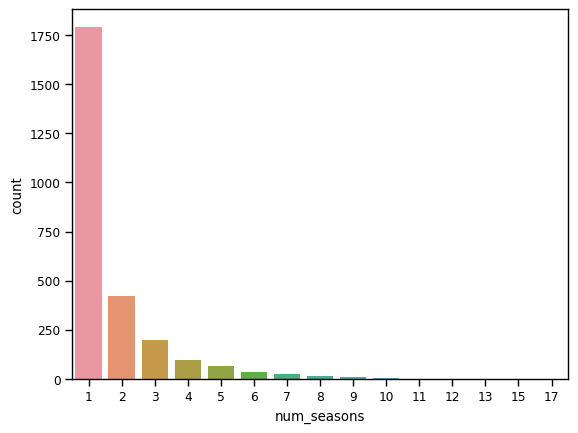

In [139]:
sns.countplot(x= "num_seasons", data= tv_show)
plt.show()

In [ ]:
# The vast majority of TV Shows have a duration of only 1 season.